# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [1]:
# !pip install pandas_datareader
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data_reader

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [3]:
fb = data_reader.DataReader("FB", data_source="yahoo")    #Facebook
ms = data_reader.DataReader("MSFT", data_source="yahoo")  #Microsoft

In [4]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-30,360.730011,352.940002,354.000000,356.299988,15976200,356.299988
2021-08-02,359.399994,350.739990,358.100006,351.950012,13180400,351.950012
2021-08-03,353.769989,347.700012,352.730011,351.239990,12406100,351.239990
2021-08-04,360.480011,351.510010,352.420013,358.920013,14180600,358.920013
2021-08-05,363.899994,356.899994,359.640015,362.970001,10247200,362.970001


In [5]:
fb.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [6]:
fb['Yesterday Close'] = fb['Close'].shift(1)
fb.head()

,Close,Yesterday Close
Date,,
2021-07-30,356.299988,NaN
2021-08-02,351.950012,356.299988
2021-08-03,351.239990,351.950012
2021-08-04,358.920013,351.239990
2021-08-05,362.970001,358.920013


Price Difference - manual 계산

In [9]:
fb['Price Difference'] = fb['Close'] - fb['Yesterday Close']
fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
Date,,,,
2021-07-30,356.299988,NaN,NaN,NaN
2021-08-02,351.950012,356.299988,-4.349976,-4.349976
2021-08-03,351.239990,351.950012,-0.710022,-0.710022
2021-08-04,358.920013,351.239990,7.680023,7.680023
2021-08-05,362.970001,358.920013,4.049988,4.049988


Price Difference - diff() method 사용

In [11]:
fb['Price Diff2'] = fb['Close'].diff()
fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
Date,,,,
2021-07-30,356.299988,NaN,NaN,NaN
2021-08-02,351.950012,356.299988,-4.349976,-4.349976
2021-08-03,351.239990,351.950012,-0.710022,-0.710022
2021-08-04,358.920013,351.239990,7.680023,7.680023
2021-08-05,362.970001,358.920013,4.049988,4.049988


In [12]:
ms['Yesterday Close'] = ms['Close'].shift(1)
ms['Price Difference'] = ms['Close'].diff()
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-01,72.580002,NaN,NaN
2017-08-02,72.260002,72.580002,-0.320000
2017-08-03,72.150002,72.260002,-0.110001
2017-08-04,72.680000,72.150002,0.529999
2017-08-07,72.400002,72.680000,-0.279999


In [13]:
print(ms['Price Difference'].loc['2017-11-03'])

0.089996337890625


In [14]:
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-01,72.580002,NaN,NaN
2017-08-02,72.260002,72.580002,-0.320000
2017-08-03,72.150002,72.260002,-0.110001
2017-08-04,72.680000,72.150002,0.529999
2017-08-07,72.400002,72.680000,-0.279999


차분한 값으로부터 원래의 값 복원하기

In [15]:
ms['Price Difference'].cumsum() + ms['Close'][0]

Date
2017-08-01           NaN
2017-08-02     72.260002
2017-08-03     72.150002
2017-08-04     72.680000
2017-08-07     72.400002
                 ...    
2022-07-25    258.829987
2022-07-26    251.899994
2022-07-27    268.739990
2022-07-28    276.410004
2022-07-29    280.739990
Name: Price Difference, Length: 1258, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [16]:
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1
ms.head()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2017-08-01,72.580002,NaN,NaN,NaN
2017-08-02,72.260002,72.580002,-0.320000,-0.004409
2017-08-03,72.150002,72.260002,-0.110001,-0.001522
2017-08-04,72.680000,72.150002,0.529999,0.007346
2017-08-07,72.400002,72.680000,-0.279999,-0.003852


In [17]:
ms.tail()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2022-07-25,258.829987,260.359985,-1.529999,-0.005876
2022-07-26,251.899994,258.829987,-6.929993,-0.026774
2022-07-27,268.739990,251.899994,16.839996,0.066852
2022-07-28,276.410004,268.739990,7.670013,0.028541
2022-07-29,280.739990,276.410004,4.329987,0.015665


In [18]:
ms['Close'][1:] / ms['Close'][:-1].values - 1

Date
2017-08-02   -0.004409
2017-08-03   -0.001522
2017-08-04    0.007346
2017-08-07   -0.003852
2017-08-08    0.005387
                ...   
2022-07-25   -0.005876
2022-07-26   -0.026774
2022-07-27    0.066852
2022-07-28    0.028541
2022-07-29    0.015665
Name: Close, Length: 1257, dtype: float64

In [19]:
ms['Close'].pct_change()

Date
2017-08-01         NaN
2017-08-02   -0.004409
2017-08-03   -0.001522
2017-08-04    0.007346
2017-08-07   -0.003852
                ...   
2022-07-25   -0.005876
2022-07-26   -0.026774
2022-07-27    0.066852
2022-07-28    0.028541
2022-07-29    0.015665
Name: Close, Length: 1258, dtype: float64

In [20]:
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1 주를 계속 보유하였다면 누적 수익율은")
print((1+ms['Return']).cumprod())

1824 일간 1 주를 계속 보유하였다면 누적 수익율은
Date
2017-08-01         NaN
2017-08-02    0.995591
2017-08-03    0.994075
2017-08-04    1.001378
2017-08-07    0.997520
                ...   
2022-07-25    3.566134
2022-07-26    3.470653
2022-07-27    3.702673
2022-07-28    3.808349
2022-07-29    3.868007
Name: Return, Length: 1258, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [21]:
# 3일 이동평균
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

Date
2021-07-30           NaN
2021-08-02           NaN
2021-08-03    353.163330
2021-08-04    354.036672
2021-08-05    357.710002
                 ...    
2022-07-25    173.029999
2022-07-26    165.023331
2022-07-27    165.126663
2022-07-28    163.149999
2022-07-29    163.133336
Name: Close, Length: 252, dtype: float64

In [22]:
fb['Close'].rolling(3).mean()

Date
2021-07-30           NaN
2021-08-02           NaN
2021-08-03    353.163330
2021-08-04    354.036672
2021-08-05    357.710002
                 ...    
2022-07-25    173.029999
2022-07-26    165.023331
2022-07-27    165.126663
2022-07-28    163.149999
2022-07-29    163.133336
Name: Close, Length: 252, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

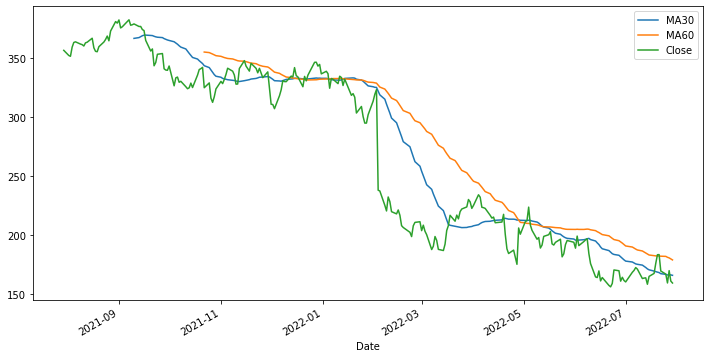

In [23]:
fb['ma30'] = fb['Close'].rolling(30).mean()
fb['ma60'] = fb['Close'].rolling(60).mean()#plot the moving average

#plot the moving average
plt.figure(figsize=(12, 6))
fb['ma30'].plot(label='MA30')
fb['ma60'].plot(label='MA60')
fb['Close'].plot(label='Close')
plt.legend()

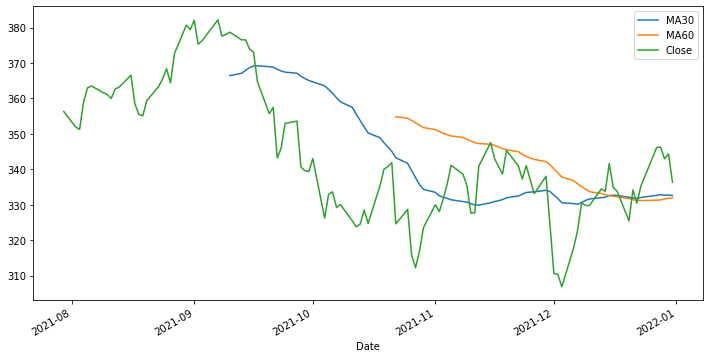

In [24]:
#특정 기간을 slicing한 이동평균 plot
plt.figure(figsize=(12, 6))
fb['ma30'].loc['2021-01-01':'2021-12-31'].plot(label='MA30')
fb['ma60'].loc['2021-01-01':'2021-12-31'].plot(label='MA60')
fb['Close'].loc['2021-01-01':'2021-12-31'].plot(label='Close')
plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [25]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504


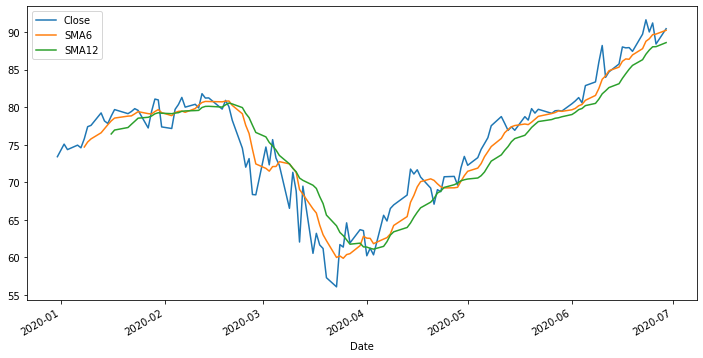

In [26]:
#SMA : Simple Moving Average

df['SMA6'] = df['Close'].rolling(window=6).mean()
df['SMA12'] = df['Close'].rolling(window=12).mean()
df.plot(figsize=(12, 6));

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [27]:
df['EWMA12'] = df['Close'].ewm(span=12).mean()
df.tail()

,Close,SMA6,SMA12,EWMA12
Date,,,,
2020-06-23,91.632500,88.771666,87.052082,87.036708
2020-06-24,90.014999,89.104167,87.606249,87.494907
2020-06-25,91.209999,89.656250,88.040624,88.066459
2020-06-26,88.407501,89.735416,88.057082,88.118927
2020-06-29,90.445000,90.237916,88.596249,88.476785


<AxesSubplot:xlabel='Date'>

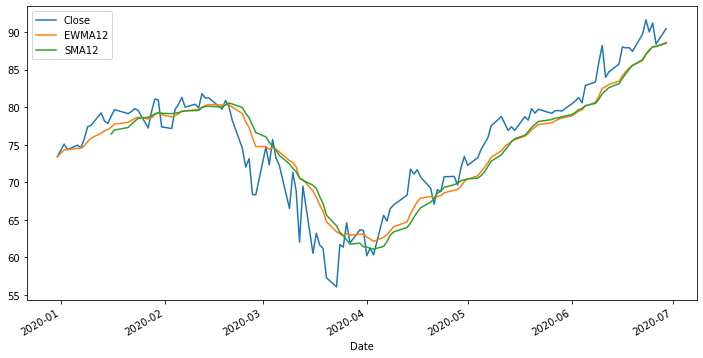

In [28]:
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))